# ⚠️ EDIT "OPEN IN COLAB" BADGE PRIOR TO DOING ASSIGNMENT

<a target="_blank" href="https://colab.research.google.com/github/BenjaminHerrera/MAT422/blob/main/HW_3.5_3.6.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# HW 3.5 and 3.6
# Benjamin Herrera
# 3 NOV 2024

# ⚠️ Run these commands prior to running anything

In [1]:
!pip install scipy
!pip install matplotlib
!pip install numpy
!pip install scikit-learn

## 🎱📊👌 K-Means

Remember when you were a kid and you had to organize what toys you had. You had to do this before your parents came home or else they would scold you for not cleaning your room up. Sure, you can organize each toy based on their theme or whatever classification system you had in your head. But, that would take a lot of time!. So, you had to look around where the bins are in your room and place your scattered toys to the bins that are the nearest to it. This is much more time efficient and the likelihood of your parents getting mad is now limited. In essence you did something that K-means, in a way, groups items in $\Reals^d$ to their respective classes. This is done with squared euclidean distances and it clusters items to a determined class types. However the way to cluster such points is difficult to do. The way that this algorithm works is by following these 5 steps (quoting from the chapter):

1. First, group the data into $k$ number of classes. This means that $k$ is defined by the user
2. Choose $k$ items at random as each cluster groups together
3. Depending on the distance to the center of the classes and other points, assign the closer class to closer points
4. Find the mean of the distance of all items in every class
5. Do this until each points are assigned to class, consistently, in later rounds

To understand the performance we are trying to decrease the "loss" of the model grouping the points. This loss function is defined as:

$$\min\sum_{i=1}^k \sum_{x\isin A_i} ||x - \mu(A_i)||^ 2$$

where $x \isin \Reals^d$ is a point on a field of $\Reals^d$ of $d$ dimensions. $A_i$ is a subset of points in $\Reals^d$.

Now, let's say there's a group of images of artists that we can vectorize into $d=3$. We want to be able to make some classification of these image vectors with K-means. Below is an example of how we can do this in python.

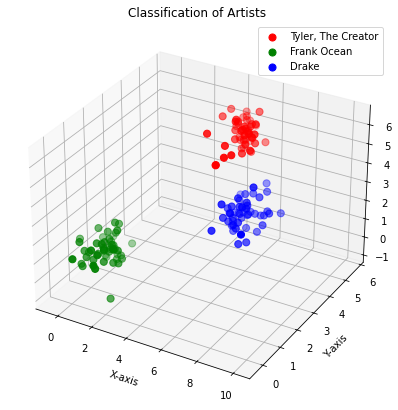

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate random vectors that represent images of artists. 
# There will be three classes:
#   1. Tyler, The Creator
#   2. Frank Ocean
#   3. Drake
np.random.seed(420 + 69)
names = ["Tyler, The Creator", "Frank Ocean", "Drake"]
tyler = np.random.normal(loc=1.0, scale=0.5, size=(50, 3))
frank = np.random.normal(loc=5.0, scale=0.5, size=(50, 3))
drake = np.random.normal(loc=[9, 1, 5], scale=0.5, size=(50, 3))

# Calculate the clusters
X = np.vstack((tyler, frank, drake))
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize the results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue']
for i in range(k):
    points = X[labels == i]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2],
               c=colors[i], label=names[i], s=50)
ax.set_title('Classification of Artists')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()
plt.show()


### 🤚🛑🎶 AUTHOR'S NOTE

On 28 OCT 2024, **Tyler, The Creator** dropped CHROMAKOPIA. This album is amazing, and I encourage you, the TA who is grading this, to give it a listen. If you need some new music to listen to while grading other people's work, please give album a listen! LINK TO CHROMAKOPIA ON SPOTIFY: [https://open.spotify.com/album/0U28P0QVB1QRxpqp5IHOlH?si=yrg0h94tSVKhPrKQNe2ffg](https://open.spotify.com/album/0U28P0QVB1QRxpqp5IHOlH?si=yrg0h94tSVKhPrKQNe2ffg)

## 🙌↗️💻 Support Vector Machine

Now, in the previous section, we went over K-means. In that method, there was no clear distinction to learn the information. In other words, there was no supervision about the data we were clustering. This means that we were classifying image vectors with no feedback, response, or any direction with where we were truly going without ground truth information. However, if we did have some inkling of whether we were right or wrong, that changes the whole story. In fact, Support Vector Machines (SVMs) do exactly that. They are a means of getting us classification tasks with iterative feedback from the data that we learn from. How do they do it? Well, SVMs find some division along the $d$-dimensional field that easily defines what groups of points are part of. Going back to the K-Means example above with the tree artists, you can kind of define some "Y" shaped structure that can group whatever points belong to the three artists. This is what SVMs do.

Now this "division" as I was calling it is more of a hyperplane. Essentially, it is some flat surface across $d$ dimensions that define these boundaries. You can define it as $w_d^Tx - b =0$ where $w$ is some coefficient of $d$ elements and $x$ is some independent variable that is being linearly transformed. $b$ on the other hand is some bias variable. To optimize the set of coefficients that best define the hyperplane over some dataset, we try to minimize the following function:

$$\min_{w, b} (\text{regularizer(w)} + \frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i(\{w, x\} - b)))$$

where $w$ is the coefficients of the hyperplane, $n$ is the number of samples in the dataset, $y_i$ is the ground truth of the $i$th sample, and $x$ is the features of the dataset. In other words, we want to minimize the error of the plane incorrectly overlapping incorrect points of the dataset. 

Using the same example structure as above, we will utilize SVMs to classify the artists based on the given image vector. We will only use Frank Ocean and Tyler, The Creator for brevity purposes (sorry Drake, I'm siding with Kendrick):

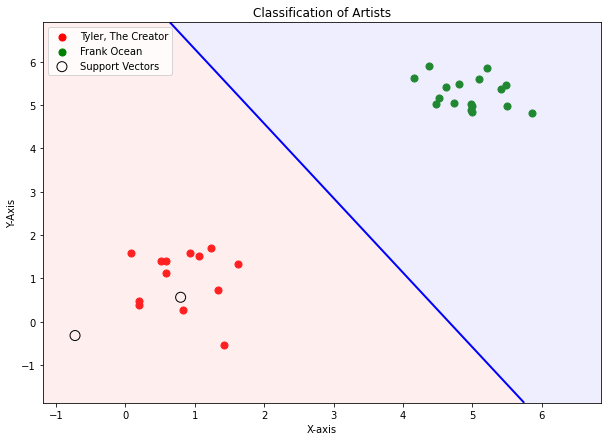

In [12]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Generate random vectors that represent images of artists.
# There will be three classes:
#   1. Tyler, The Creator
#   2. Frank Ocean
# No Drake
np.random.seed(420 + 69)
names = ["Tyler, The Creator", "Frank Ocean"]
tyler = np.random.normal(loc=1.0, scale=0.5, size=(50, 2))
frank = np.random.normal(loc=5.0, scale=0.5, size=(50, 2))

# Formulate dataset
X = np.vstack((tyler, frank))
y = np.array([0] * 50 + [1] * 50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train an SVM
svm_classifier = SVC(kernel="linear")
svm_classifier.fit(X_train_scaled, y_train)

# Plot the points of the dataset and the hyperplane of the SVM
plt.figure(figsize=(10, 7))
colors = ["red", "green"]
for i, name in enumerate(names):
    points = X_test[y_test == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=name, s=50)
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500),
)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)
Z = svm_classifier.decision_function(grid_scaled)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="blue")
plt.contourf(
    xx,
    yy,
    Z,
    levels=[Z.min(), 0, Z.max()],
    colors=["#FFAAAA", "#AAAAFF"],
    alpha=0.2,
)
plt.scatter(
    svm_classifier.support_vectors_[:, 0],
    svm_classifier.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
    label="Support Vectors",
)
plt.title("Classification of Artists")
plt.xlabel("X-axis")
plt.ylabel("Y-Axis")
plt.legend()
plt.show()